In [ ]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train.csv


In [ ]:
import pandas as pd

df = pd.read_csv("train.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,22789,160000.0,2,2,2,33,2,2,3,2,...,164310,162681.0,163005.0,15000.0,0.0,0.0,6100.0,12300.0,6100.0,0
1,29007,150000.0,2,1,2,34,1,-1,-1,-2,...,0,0.0,0.0,53.0,0.0,0.0,0.0,0.0,0.0,0
2,16951,10000.0,1,2,1,50,1,2,0,0,...,8067,8227.0,8400.0,2.0,1281.0,1134.0,294.0,305.0,1000.0,0
3,22281,220000.0,2,1,2,29,0,0,0,0,...,218513,131660.0,134346.0,9100.0,9000.0,7887.0,4800.0,4900.0,6000.0,1
4,11347,310000.0,2,1,2,32,1,-2,-1,0,...,326,-235.0,-235.0,0.0,326.0,0.0,0.0,0.0,1200.0,0


## Basic Dataset Info

In [ ]:
df.info()
df.describe()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24000 entries, 0 to 23999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          24000 non-null  int64  
 1   LIMIT_BAL                   24000 non-null  float64
 2   SEX                         24000 non-null  int64  
 3   EDUCATION                   24000 non-null  int64  
 4   MARRIAGE                    24000 non-null  int64  
 5   AGE                         24000 non-null  int64  
 6   PAY_0                       24000 non-null  int64  
 7   PAY_2                       24000 non-null  int64  
 8   PAY_3                       24000 non-null  int64  
 9   PAY_4                       24000 non-null  int64  
 10  PAY_5                       24000 non-null  int64  
 11  PAY_6                       24000 non-null  int64  
 12  BILL_AMT1                   24000 non-null  int64  
 13  BILL_AMT2                   240

(24000, 25)

## Check Missing Values

In [ ]:
df.isna().sum()

,0
ID,0
LIMIT_BAL,0
SEX,0
EDUCATION,0
MARRIAGE,0
AGE,0
PAY_0,0
PAY_2,0
PAY_3,0
PAY_4,0


## Target Variable Distribution

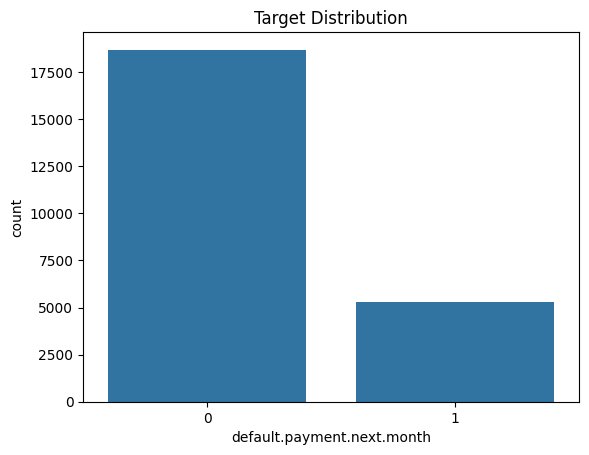

,proportion
default.payment.next.month,
0,0.778792
1,0.221208


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x=df['default.payment.next.month'])
plt.title("Target Distribution")
plt.show()

df['default.payment.next.month'].value_counts(normalize=True)

## Numerical Features Distribution

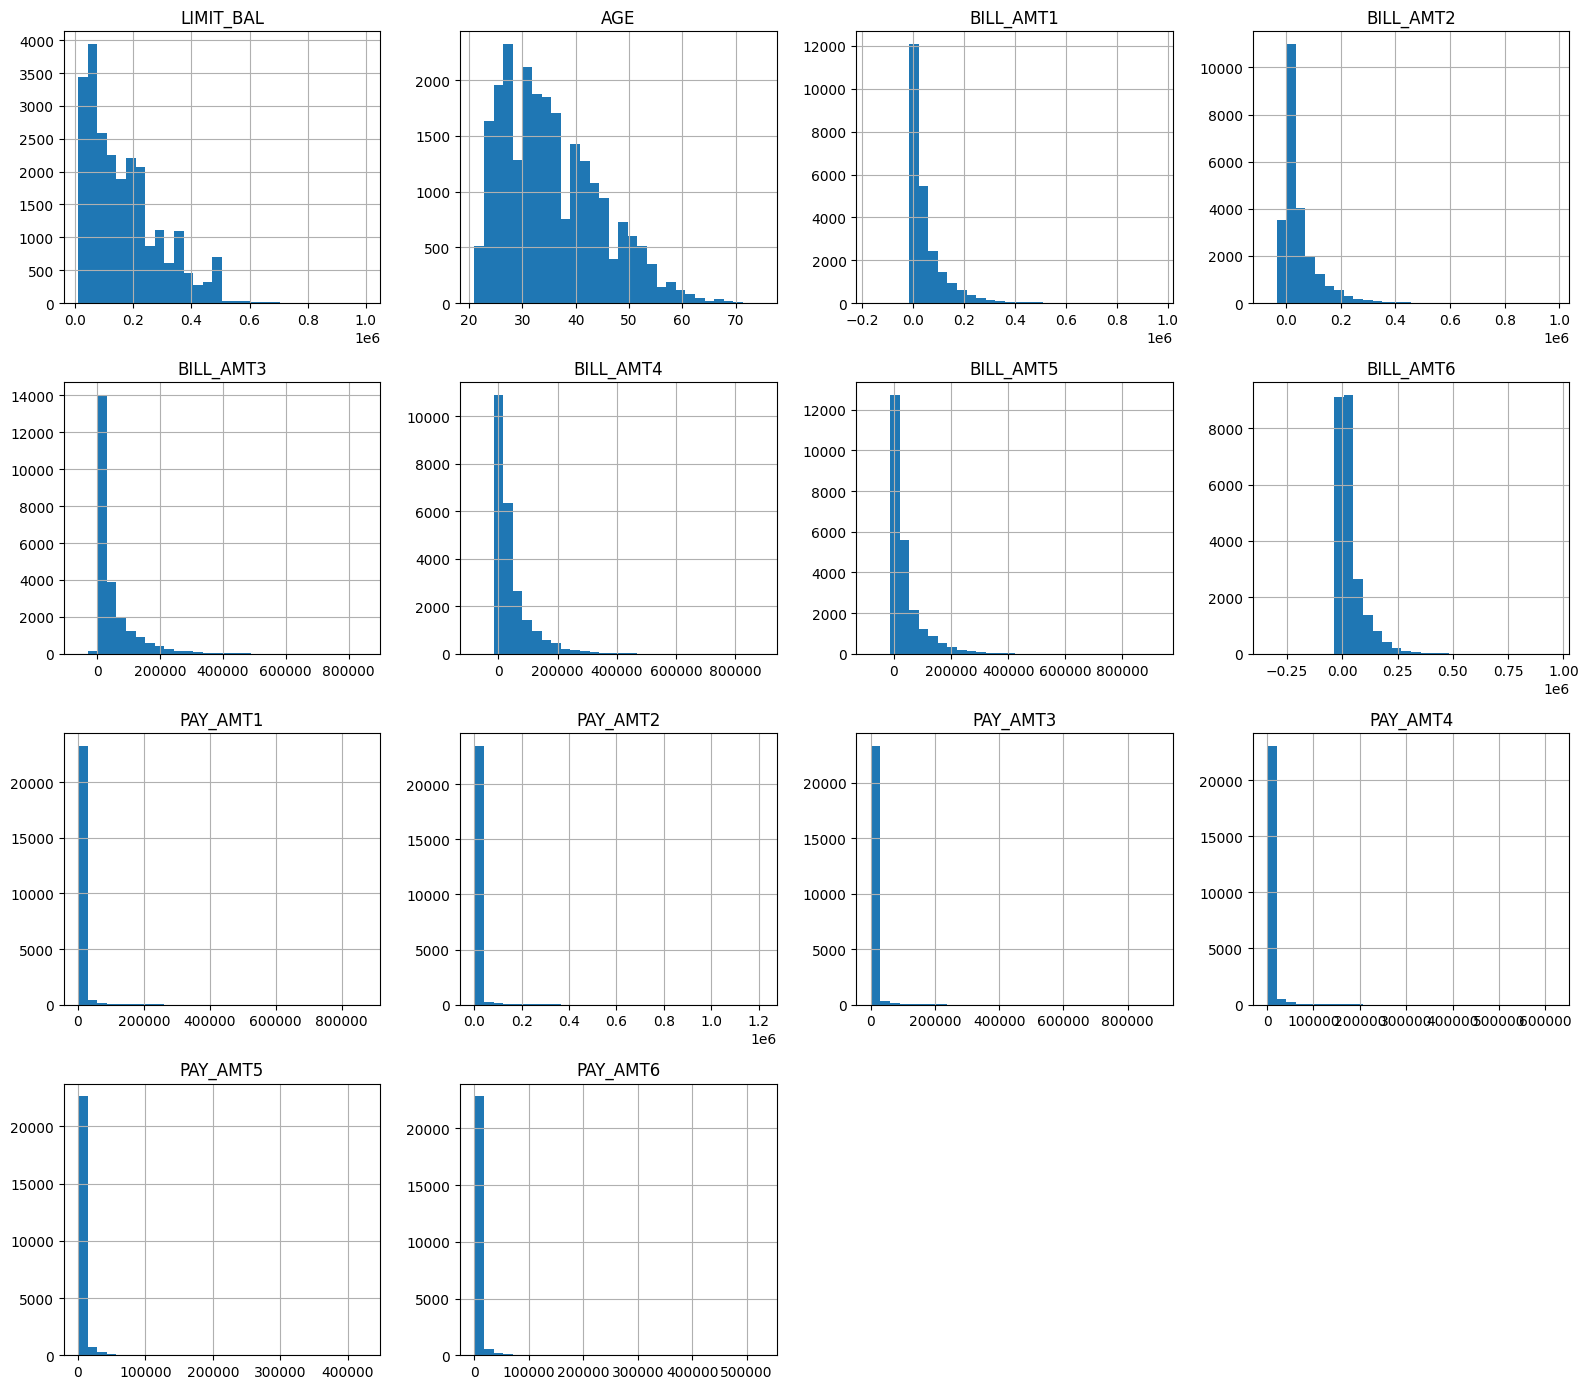

In [ ]:
num_cols = ['LIMIT_BAL', 'AGE'] + [f'BILL_AMT{i}' for i in range(1, 7)] + [f'PAY_AMT{i}' for i in range(1, 7)]

df[num_cols].hist(figsize=(16, 14), bins=30)
plt.tight_layout()
plt.show()

## Categorical Features Analysis

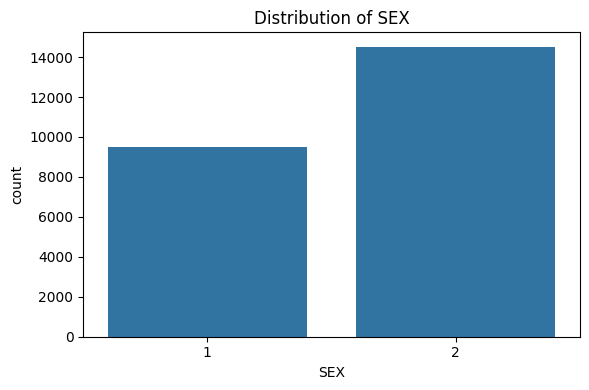

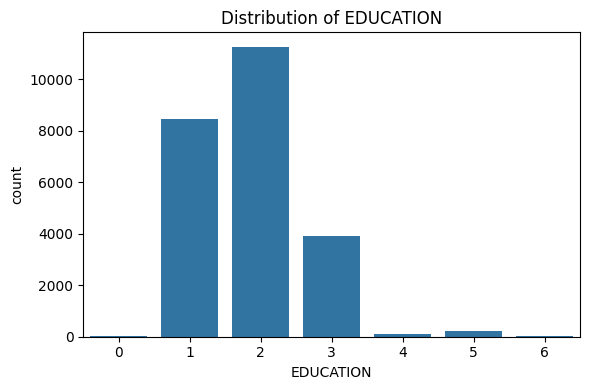

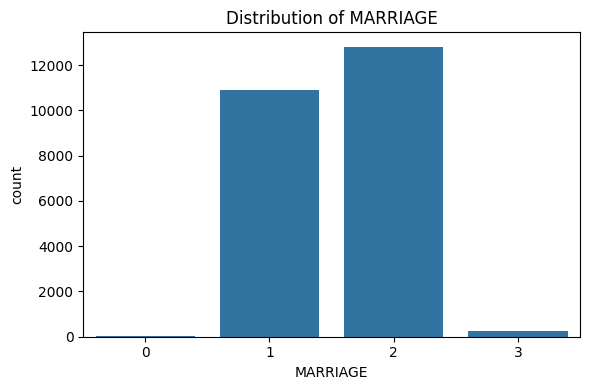

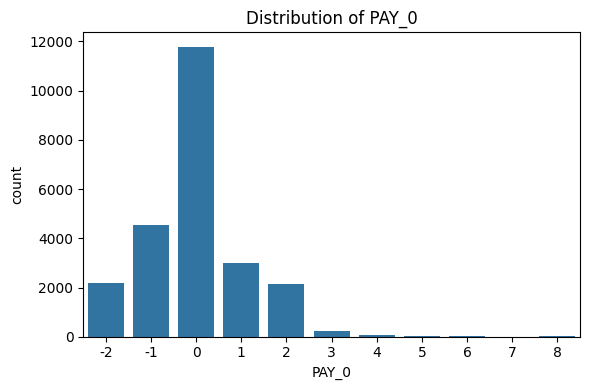

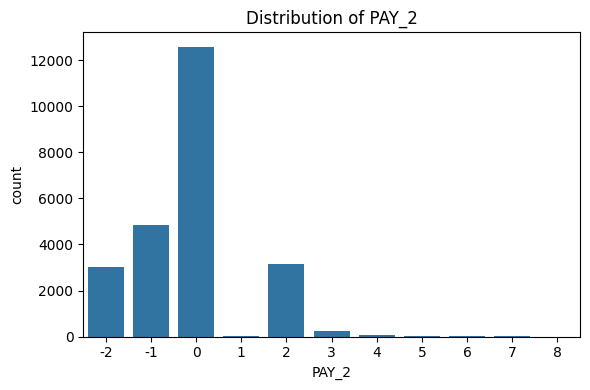

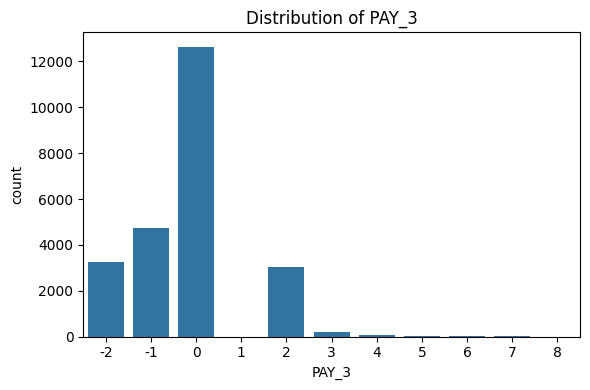

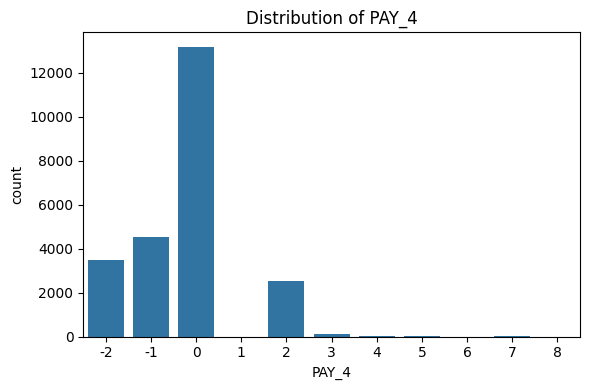

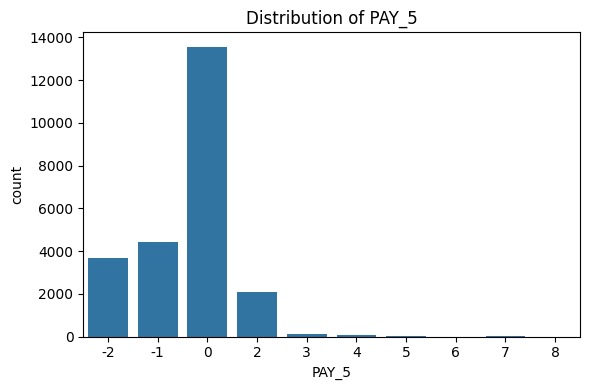

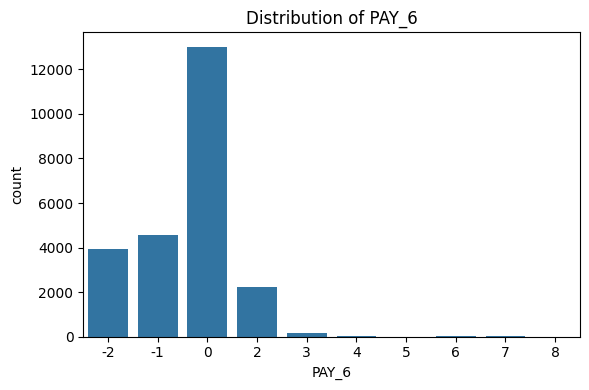

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Clarify categorical
cat_cols = [
    'SEX', 'EDUCATION', 'MARRIAGE',
    'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'   # 注意：没有 PAY_1
]

# 2. Distribution
for col in cat_cols:
    if col not in df.columns:
        print(f"Column {col} not in dataframe, skip.")
        continue

    plt.figure(figsize=(6,4))
    sns.countplot(x=df[col])
    plt.title(f"Distribution of {col}")
    plt.tight_layout()
    plt.show()

## Correlation Heatmap

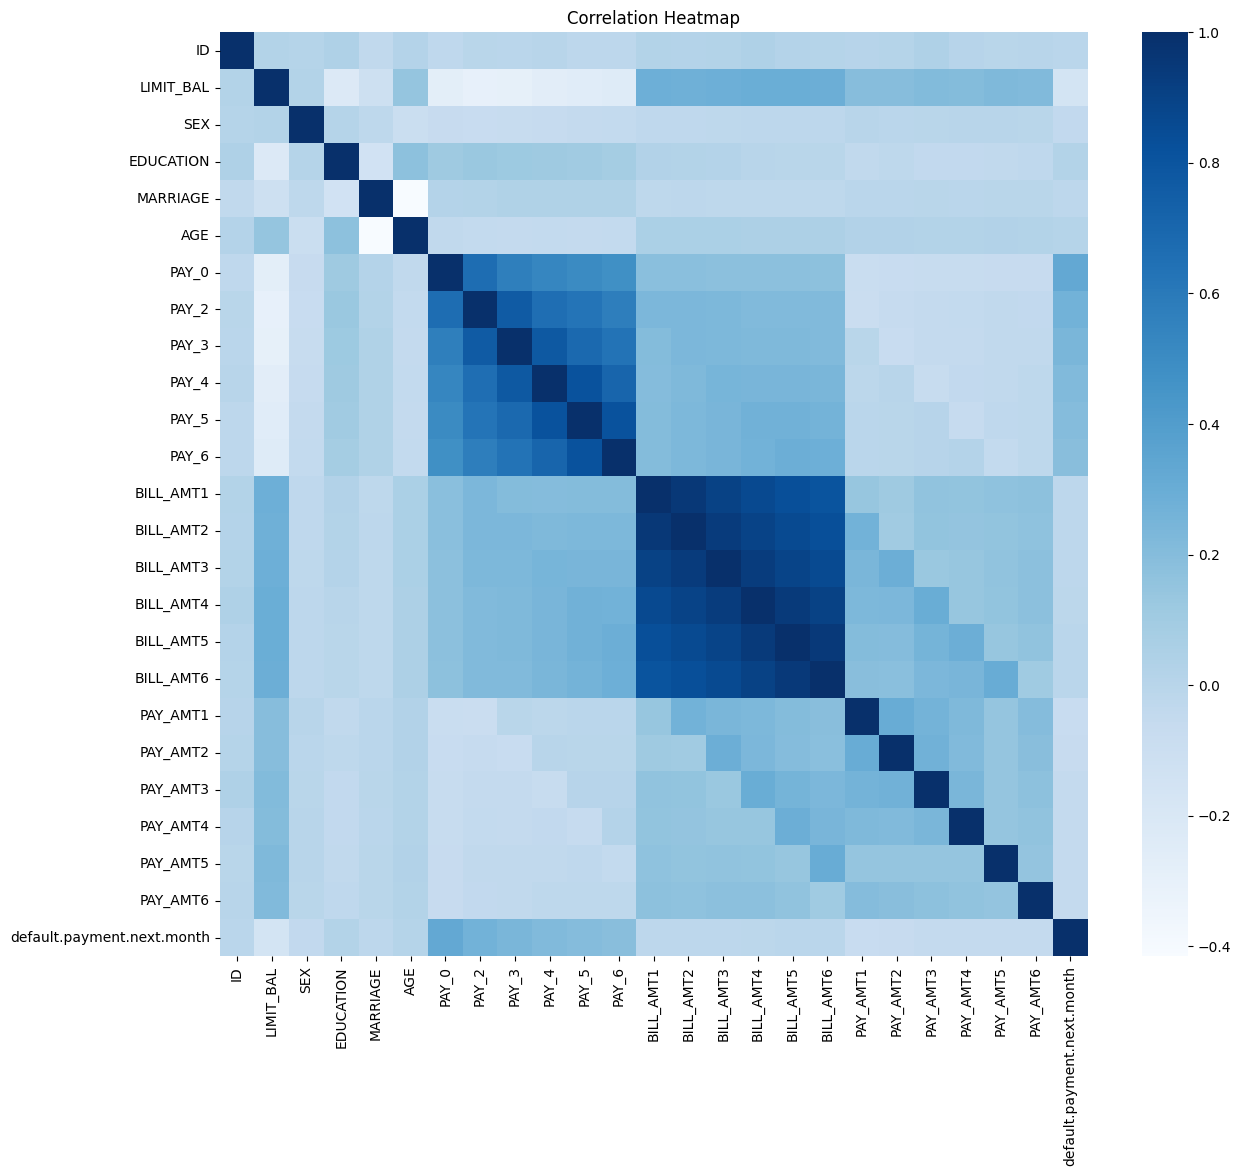

In [ ]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(), cmap="Blues")
plt.title("Correlation Heatmap")
plt.show()

# Exploratory Data Analysis (EDA)

## 1. Dataset Overview
The training dataset contains 25 features covering demographic attributes, credit limits, past repayment status, bill amounts, and previous payment amounts.  
The target variable (**default payment next month**) is binary (0 = no default, 1 = default).

## 2. Target Variable Distribution
The target distribution is imbalanced, with non-default cases significantly outnumbering default cases.  
This imbalance indicates that accuracy alone is not sufficient for evaluation; metrics such as F1-score, precision, and recall are more appropriate.

## 3. Demographic Features

### SEX
The dataset contains more female clients than male clients.  
Default rates differ slightly across genders, with male clients showing a marginally higher default probability.

### EDUCATION
Most clients fall into education levels 1 and 2 (graduate school and university).  
Higher education levels are generally associated with lower default likelihood.

### MARRIAGE
Married clients form the largest group, followed by single clients.  
Single clients tend to exhibit a slightly higher default rate.

### AGE
Age values cluster heavily between 25 and 40 years old.  
Younger clients show higher default tendencies compared to older clients.

## 4. Credit Limit Analysis (LIMIT_BAL)
LIMIT_BAL is right-skewed, with many clients receiving relatively low credit limits.  
Higher credit limits correlate with lower default probabilities, suggesting that clients with stronger financial standing manage credit more reliably.

## 5. Repayment Status Features (PAY_0 to PAY_6)
These features represent past monthly repayment behavior.  
Higher values (e.g., 1, 2, 3, …) indicate payments that were delayed for multiple months.  
Clients with positive PAY_* values consistently show significantly higher default rates.

## 6. Bill Amount Features (BILL_AMT1 to BILL_AMT6)
Bill amounts display strong correlations across months, indicating stable spending patterns.  
Clients with persistently high outstanding bills tend to default more frequently.

## 7. Payment Amount Features (PAY_AMT1 to PAY_AMT6)
Payment amounts are highly skewed, with many zero or small payments and a few extremely large payments.  
Lower payment amounts relative to bill amounts suggest higher credit risk.

## 8. Key Insights Summary
- The dataset is **imbalanced**, requiring careful metric selection.  
- **Demographics** (age, marriage, education) show meaningful patterns in default behavior.  
- **Repayment history** is the strongest predictor: delayed payments strongly correlate with default.  
- **Credit limits and payment behavior** further differentiate high- and low-risk clients.

This EDA provides a foundation for understanding the dataset before training and monitoring the machine learning model.
